In [50]:
import json
import numpy as np
import matplotlib.pyplot as plt

def open_dataset(json_path):
    with open(json_path, "r") as f:
        info = json.load(f)

    return info

def explore_dataset(info, get_novel_stats=False):

    n_categories = len(info["categories"])
    n_images = len(info["images"])
    n_annotations = len(info["annotations"])

    n_effective_images = len(np.unique([ann["image_id"] for ann in info["annotations"]]))

    avg_ann_per_img = n_annotations/n_effective_images

    img_width = np.array([img["width"] for img in info["images"]])
    avg_width, std_width = img_width.mean(), img_width.std()

    img_height = np.array([img["height"] for img in info["images"]])
    avg_height, std_height = img_height.mean(), img_height.std()

    ann_area = np.array([ann["area"] for ann in info["annotations"]])
    avg_area, std_area = ann_area.mean(), ann_area.std()

    categories = np.array([ann["category_id"] for ann in info["annotations"]])
    cat_count = np.unique(categories, return_counts=True)

    n_effective_categories = len(cat_count[0])
    sorted_counts = sorted(cat_count[1])

    return_dict = {
        "n_categories":n_categories, #
        "n_effective_categories":n_effective_categories,  #
        "n_images":n_images,  #
        "n_effective_images":n_effective_images,  #
        "n_annotations":n_annotations, #
        "avg_ann_per_img":avg_ann_per_img,  # 
        "avg_width":avg_width, 
        "std_width":std_width,
        "avg_height":avg_height, 
        "std_height":std_height, 
        "avg_area":avg_area, 
        "std_area":std_area, 
        "sorted_counts":sorted_counts,
        "img_width":img_width,
        "img_height":img_height,
        "ann_area":ann_area
        }
    
    if get_novel_stats:
        novel_cats = []
        for t in sorted(zip(cat_count[1], cat_count[0])):
            
            if 100 <= t[0] <= 115 and t[1] not in [429, 3513]:
                novel_cats.append(t[1])

        n_effective_categories = len(novel_cats)
        novel_ann = [ann for ann in info["annotations"] if (ann["category_id"] in novel_cats)]

        n_annotations = len(novel_ann)

        sorted_counts = sorted(np.unique([ann["category_id"] for ann in novel_ann], return_counts=True)[1])

        novel_img_ids = np.unique([ann["image_id"] for ann in novel_ann])
        novel_imgs = [img for img in info["images"] if (img["id"] in novel_img_ids)]

        n_effective_images = len(novel_img_ids)

        avg_ann_per_img = n_annotations/n_effective_images

        img_width = np.array([img["width"] for img in novel_imgs])
        avg_width, std_width = img_width.mean(), img_width.std()

        img_height = np.array([img["height"] for img in novel_imgs])
        avg_height, std_height = img_height.mean(), img_height.std()

        ann_area = np.array([ann["area"] for ann in novel_ann])
        avg_area, std_area = ann_area.mean(), ann_area.std()

        return_dict_novel = {
            "n_effective_categories":n_effective_categories,  #
            "n_effective_images":n_effective_images,  #
            "n_annotations":n_annotations, #
            "avg_ann_per_img":avg_ann_per_img,  # 
            "avg_width":avg_width, 
            "std_width":std_width,
            "avg_height":avg_height, 
            "std_height":std_height, 
            "avg_area":avg_area, 
            "std_area":std_area, 
            "sorted_counts":sorted_counts,
            "img_width":img_width,
            "img_height":img_height,
            "ann_area":ann_area
            }
        
        return return_dict, return_dict_novel
    
    return return_dict

def explore_dataset_from_path(json_path, get_novel_stats=False):
    info = open_dataset(json_path)
    return explore_dataset(info, get_novel_stats=get_novel_stats)
    

In [51]:
full = open_dataset("../../data/full_2017_bboxes.json")
print(full["annotations"][0])
print(full["images"][0])

{'area': 41823.5, 'iscrowd': 0, 'image_id': 0, 'bbox': [184, 139, 359, 233], 'category_id': 0, 'id': 0}
{'license': '3', 'file_name': 'train_val_images/Mammalia/Marmota flaviventris/6e95e4ae165c3bd2b74490d0d655cc2d.jpg', 'rights_holder': 'R.J. Adams', 'height': 532, 'width': 800, 'id': 0}


In [52]:
base_train_dset = open_dataset("../../data/base_train.json")
base_val_dset = open_dataset("../../data/base_val.json") 
base_test_dset = open_dataset("../../data/base_test.json")

base_full_dset = {}

base_full_dset["images"] = base_train_dset["images"].copy() + base_val_dset["images"].copy() + base_test_dset["images"].copy()
base_full_dset["categories"] = base_train_dset["categories"].copy() + base_val_dset["categories"].copy() + base_test_dset["categories"].copy()
base_full_dset["annotations"] = base_train_dset["annotations"].copy() + base_val_dset["annotations"].copy() + base_test_dset["annotations"].copy()

print(len(base_full_dset["images"]))
print(len(base_train_dset["images"]))
print(len(base_val_dset["images"]))
print(len(base_test_dset["images"]))

213312
170553
21216
21543


In [53]:
full, novel = explore_dataset_from_path("../../data/full_2017_bboxes.json", get_novel_stats=True)

In [54]:
base_full = explore_dataset(base_full_dset)
base_train = explore_dataset_from_path("../../data/base_train.json") 
base_val = explore_dataset_from_path("../../data/base_val.json") 
base_test = explore_dataset_from_path("../../data/base_test.json") 

In [55]:
dsets = [full, base_full, novel]
comparison = [base_full, base_train, base_val, base_test]

In [56]:
def get_data_for_plot(datasets, key):
    for_plot = []
    for d in datasets:
        if key in d.keys():
            for_plot.append(d[key])
    return for_plot

Text(0.5, 1.0, 'iNaturalist class imbalance')

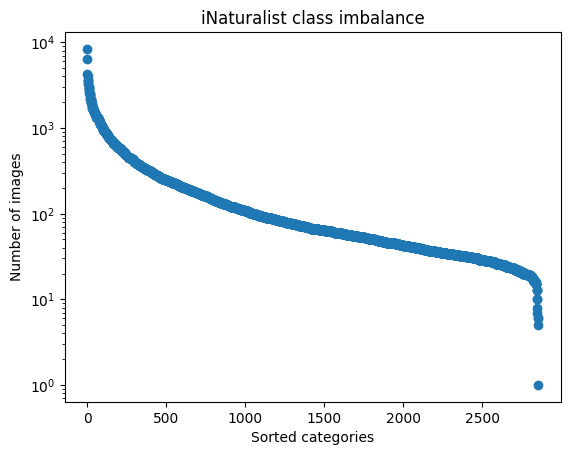

In [57]:
for_plot = get_data_for_plot([full], "sorted_counts")
plt.scatter(range(len(for_plot[0])),list(reversed(for_plot[0])))
plt.yscale("log")
plt.ylabel("Number of images")
plt.xlabel("Sorted categories")
plt.title("iNaturalist class imbalance")

In [68]:
for_plot = get_data_for_plot(dsets, "sorted_counts")
labels = ["Full", "Base", "Novel"]

In [70]:
print("Minimum categories for base class: ", min(for_plot[1]))
print("Max categories for base class: ", max(for_plot[1]))
print("Minimum categories for novel class: ", min(for_plot[2]))
print("Max categories for novel class: ", max(for_plot[2]))

Minimum categories for base class:  507
Max categories for base class:  8386
Minimum categories for novel class:  100
Max categories for novel class:  115


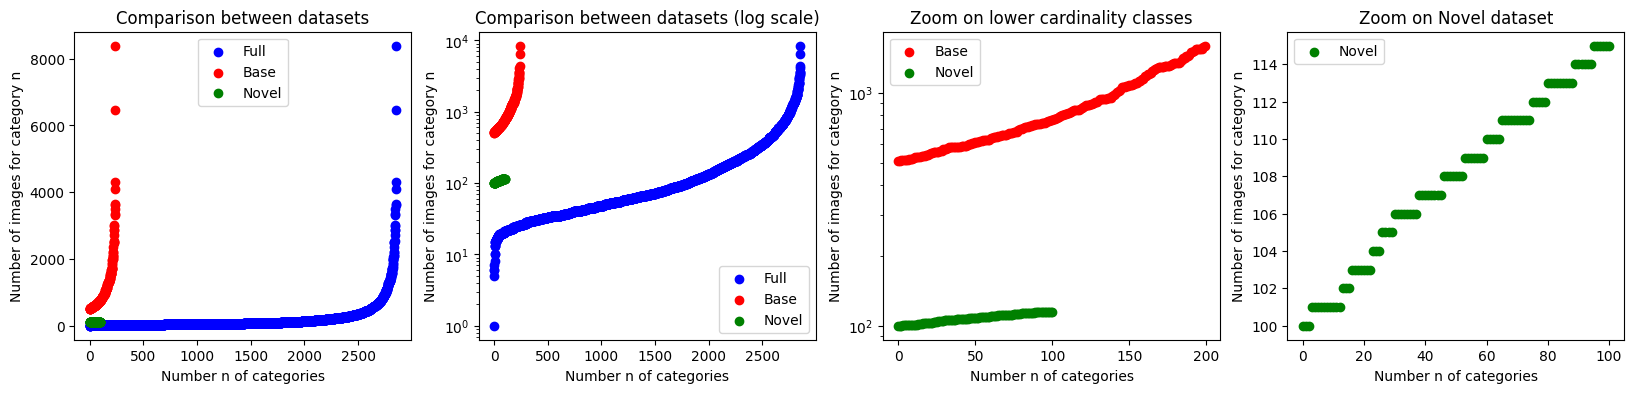

In [60]:
fig, axs = plt.subplots(1, 4, figsize=(20, 4))

colors = ["b", "red", "g"]
for i in range(len(for_plot)):
    axs[0].scatter(range(len(for_plot[i])), for_plot[i], color=colors[i])

axs[0].legend(labels)
axs[0].set_xlabel("Number n of categories")
axs[0].set_ylabel("Number of images for category n")
axs[0].set_title("Comparison between datasets")

for i in range(len(for_plot)):
    axs[1].scatter(range(len(for_plot[i])), for_plot[i], color=colors[i])

axs[1].legend(labels)
axs[1].set_xlabel("Number n of categories")
axs[1].set_ylabel("Number of images for category n")
axs[1].set_title("Comparison between datasets (log scale)")
axs[1].set_yscale("log")

for i in range(1, len(for_plot)):
    axs[2].scatter(range(len(for_plot[i][:200])), for_plot[i][:200], color=colors[i])

axs[2].legend(labels[1:])
axs[2].set_xlabel("Number n of categories")
axs[2].set_ylabel("Number of images for category n")
axs[2].set_title("Zoom on lower cardinality classes")
axs[2].set_yscale("log")

for i in range(2, len(for_plot)):
    axs[3].scatter(range(len(for_plot[i])), for_plot[i], color=colors[i])

axs[3].legend(labels[2:])
axs[3].set_xlabel("Number n of categories")
axs[3].set_ylabel("Number of images for category n")
axs[3].set_title("Zoom on Novel dataset")


# plt.hlines([100, 115, 173], xmin=0, xmax=2*len(for_plot[2]))
plt.show()




In [61]:
213312/444319*100

48.00875046982011

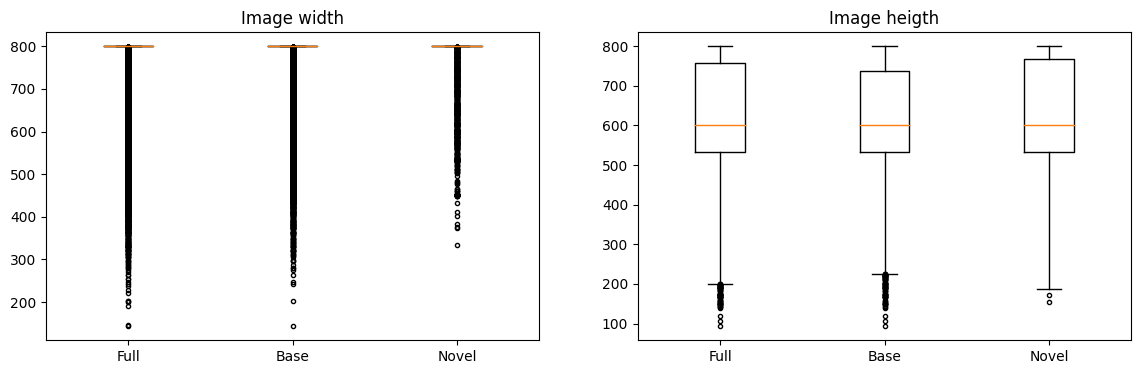

In [62]:
fig, axs = plt.subplots(1,2, figsize=(14, 4))
labels = ["Full", "Base", "Novel"]

for_plot = get_data_for_plot(dsets, "img_width")
axs[0].boxplot(for_plot, labels=labels, sym=".")
axs[0].set_title("Image width")

for_plot = get_data_for_plot(dsets, "img_height")
axs[1].boxplot(for_plot, labels=labels, sym=".")
axs[1].set_title("Image heigth")

plt.show()

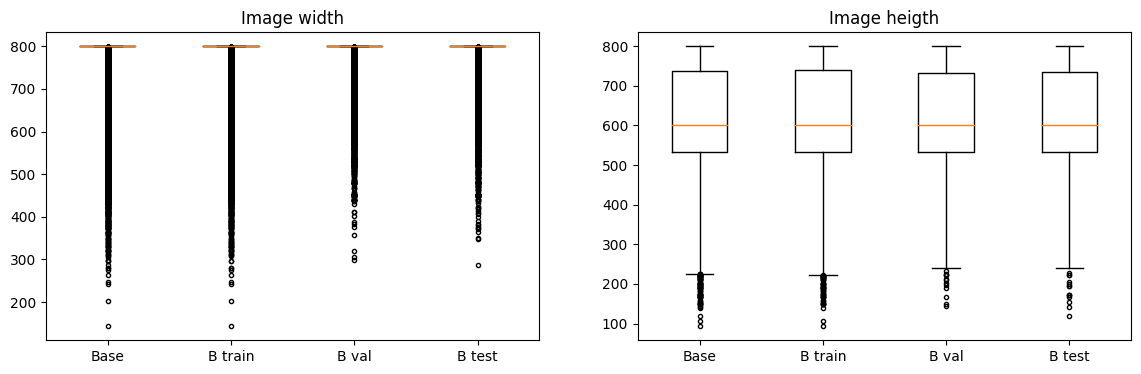

In [63]:
fig, axs = plt.subplots(1,2, figsize=(14, 4))
labels = ["Base", "B train", "B val", "B test"]

for_plot = get_data_for_plot(comparison, "img_width")
axs[0].boxplot(for_plot, labels=labels, sym=".")
axs[0].set_title("Image width")

for_plot = get_data_for_plot(comparison, "img_height")
axs[1].boxplot(for_plot, labels=labels, sym=".")
axs[1].set_title("Image heigth")

plt.show()

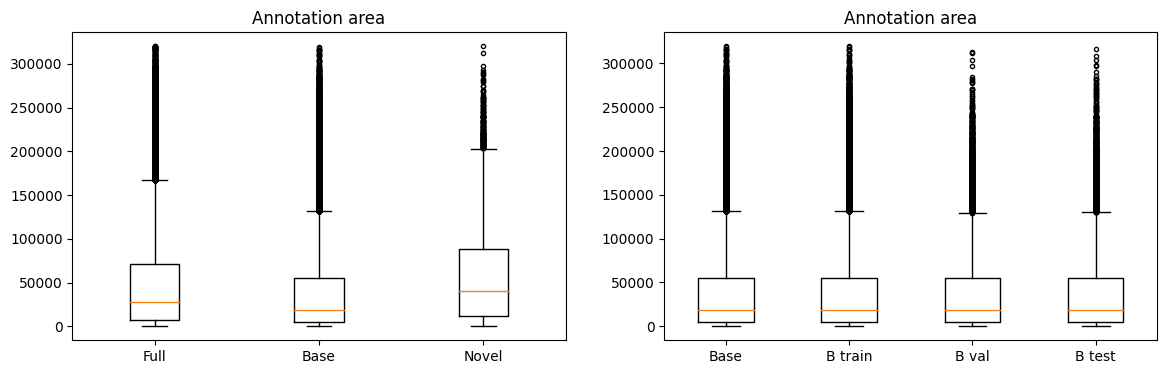

In [64]:
fig, axs = plt.subplots(1,2, figsize=(14, 4))

labels = ["Full", "Base", "Novel"]
for_plot = get_data_for_plot(dsets, "ann_area")
axs[0].boxplot(for_plot, labels=labels, sym=".")
axs[0].set_title("Annotation area")


labels = ["Base", "B train", "B val", "B test"]
for_plot = get_data_for_plot(comparison, "ann_area")
axs[1].boxplot(for_plot, labels=labels, sym=".")
axs[1].set_title("Annotation area")

plt.show()

In [83]:
for cat in ["n_categories", "n_effective_categories",
            "n_effective_images", "n_annotations", "avg_ann_per_img"]:
    print("\n",cat)
    print(get_data_for_plot(dsets, cat))
    print(get_data_for_plot(comparison, cat))

print("\nAverage ratio of ann_area / img_area")
print([c/(a*b)*100 for a,b,c in zip(get_data_for_plot(dsets, "avg_width"),get_data_for_plot(dsets, "avg_height"),get_data_for_plot(dsets, "avg_area"))])
print([c/(a*b)*100 for a,b,c in zip(get_data_for_plot(comparison, "avg_width"),get_data_for_plot(comparison, "avg_height"),get_data_for_plot(comparison, "avg_area"))])




 n_categories
[5089, 720]
[720, 240, 240, 240]

 n_effective_categories
[2854, 240, 101]
[240, 240, 240, 240]

 n_effective_images
[444319, 213312, 9328]
[213312, 170553, 21216, 21543]

 n_annotations
[544900, 279913, 10903]
[279913, 223837, 27798, 28278]

 avg_ann_per_img
[1.2263711432551838, 1.3122234098409842, 1.1688464837049743]
[1.3122234098409842, 1.312419013444501, 1.310237556561086, 1.3126305528477928]

Average ratio of ann_area / img_area
[9.785633310500787, 7.8557416258429695, 11.770185600705805]
[7.8557416258429695, 7.861937860845073, 7.818535765103385, 7.843269131194501]
